In [11]:
import os

from typing import Dict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import add_path

add_path()

import model
from model.utils import common_params
from model import EV, PHEV, CV

In [12]:
plt.style.use("dark_background")
plt.rc("grid", alpha=0.3)

In [13]:
# lines = []
cp = model.utils.common_params.copy()

In [14]:
class Society_car_prices(model.SocietyConstantsEnergyPrices):
    def _set_unique_initial(self, **kwargs):
        self.lines = []
        return super()._set_unique_initial(**kwargs)

    def _get_annual_cost(
        self, customer: model.Customer, year: int, month: int
    ) -> Dict[model.CarTypes, float]:
        val = super()._get_annual_cost(customer, year, month)
        self.lines.append(val)
        return val

In [15]:
MC = 100
T = cp["T"]
cp["kwargs"]["car_price_noise"] = lambda: 0

In [16]:
cp

{'T': 300,
 'kwargs': {'alpha': 0.01,
  'car_price_noise': <function __main__.<lambda>()>,
  'city_size': (17, 17),
  'corporation_margin': 0.2,
  'corporation_technological_progress': 0.004,
  'energy_price': 500,
  'energy_factor': 0.8,
  'fuel_price': 10,
  'government': <model.Government.GovernmentBuildChargingStation at 0x7efc3fdeca90>,
  'initial_public_chargers': 1,
  'initial_time': (2015, 1),
  'nerby_radius': 1,
  'population': 3000}}

In [17]:
soc = Society_car_prices(**cp["kwargs"])
soc.run(T)

In [18]:
max([line[EV] for line in soc.lines])

29580.325714285715

<Axes: >

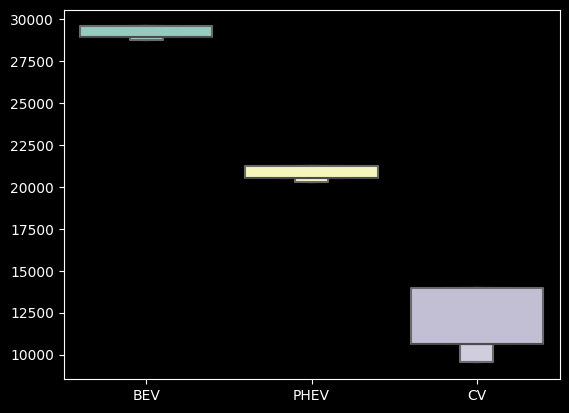

In [19]:
sns.boxenplot(pd.DataFrame(soc.lines))

In [20]:
soc.corporations.car_costs

{'CV': 105750.0, 'BEV': 165750.0, 'PHEV': 132083.33333333334}